In [1]:
clear all
cd matlab
pwd
format compact
open dtm_ex1_2


ans =

    '/Users/eechris/code/src/github.com/cpjobling/eg-247-textbook/dt_systems/4/matlab'



In [2]:
Nz = [1 1 0];

In [3]:
Dz = [1 -0.5 0.125];

In [4]:
[r,p,k] = residue(Nz,Dz)

r =
   0.7500 - 0.5000i
   0.7500 + 0.5000i


p =
   0.2500 + 0.2500i
   0.2500 - 0.2500i
k =
     1


In [5]:
Hz = tf(Nz,Dz,1)
hn = impulse(Hz, 15);


Hz =


        z^2 + z


  -------------------


  z^2 - 0.5 z + 0.125


Sample time: 1 seconds


Discrete-time transfer function.


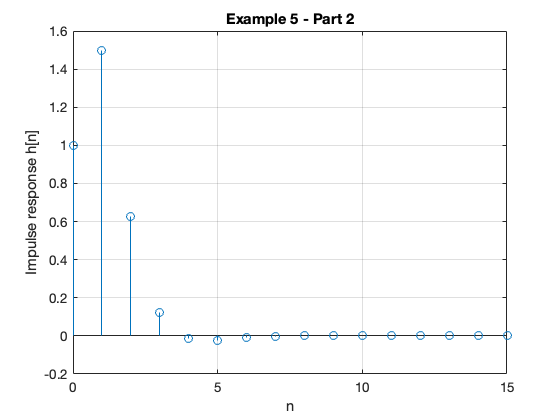

In [6]:
stem([0:15], hn)
grid
title('Example 5 - Part 2')
xlabel('n')
ylabel('Impulse response h[n]')

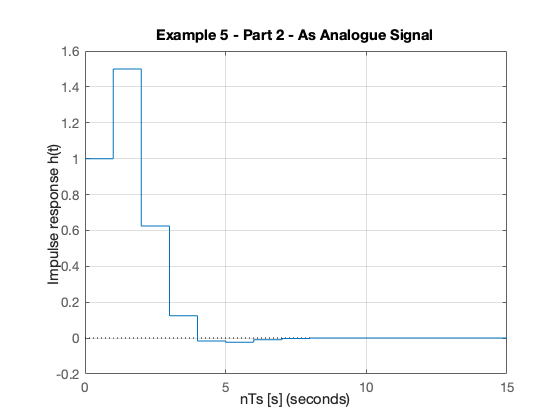

In [7]:
impulse(Hz,15)
grid
title('Example 5 - Part 2 - As Analogue Signal')
xlabel('nTs [s]')
ylabel('Impulse response h(t)')

In [8]:
open dtm_ex1_3

In [9]:
Ts = 1;
z = tf('z', Ts);

In [10]:
Hz = (z^2 + z)/(z^2 - 0.5 * z + 0.125)


Hz =


        z^2 + z


  -------------------


  z^2 - 0.5 z + 0.125


Sample time: 1 seconds


Discrete-time transfer function.


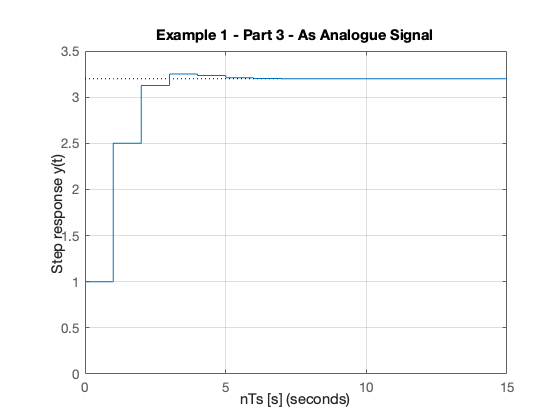

In [11]:
step(Hz)
grid
title('Example 1 - Part 3 - As Analogue Signal')
xlabel('nTs [s]')
ylabel('Step response y(t)')
axis([0,15,0,3.5])

In [12]:
dtm

In [13]:
help c2d

 C2D  Converts continuous-time dynamic system to discrete time.
 
    SYSD = C2D(SYSC,TS,METHOD) computes a discrete-time model SYSD with
    sample time TS that approximates the continuous-time model SYSC.
    The string METHOD selects the discretization method among the following:
       'zoh'           Zero-order hold on the inputs
       'foh'           Linear interpolation of inputs
       'impulse'       Impulse-invariant discretization
       'tustin'        Bilinear (Tustin) approximation.
       'matched'       Matched pole-zero method (for SISO systems only).
       'least-squares' Least-squares minimization of the error between
                       frequency responses of the continuous and discrete
                       systems (for SISO systems only).
       'damped'        Damped Tustin approximation based on TRBDF2 formula
                       (sparse models only).
    The default is 'zoh' when METHOD is omitted. The sample time TS should
    be specified in the time

eUnit" property).
 
    C2D(SYSC,TS,OPTIONS) gives access to additional discretization options. 
    Use C2DOPTIONS to create and configure the option set OPTIONS. For 
    example, you can specify a prewarping frequency for the Tustin method by:
       opt = c2dOptions('Method','tustin','PrewarpFrequency',.5);
       sysd = c2d(sysc,.1,opt);
 
    For state-space models,
       [SYSD,G] = C2D(SYSC,Ts,METHOD)
    also returns the matrix G mapping the states xc(t) of SYSC to the states 
    xd[k] of SYSD:
       xd[k] = G * [xc(k*Ts) ; u[k]]
    Given an initial condition x0 for SYSC and an initial input value u0=u(0), 
    the equivalent initial condition for SYSD is (assuming u(t)=0 for t<0):
       xd[0] = G * [x0;u0] .
 
    For gridded LTV/LPV models (see ssInterpolant), C2D discretizes the LTI
    model at each grid point and interpolates the resulting discrete-time
    data. To interpolate the continuous-time data instead, first convert
    the gridded model to LTVSS or LPVSS. Fo

ls, C2D
    uses the Tustin method which amounts to fixed-step integration with the
    trapezoidal rule.
 
    See also C2DOPTIONS, D2C, D2D, SSINTERPOLANT, LTVSS, LPVSS, DYNAMICSYSTEM.

    Documentation for c2d
       doc c2d

    Other uses of c2d

       DynamicSystem/c2d    ltipack.tfdata/c2d



In [14]:
doc c2d

In [15]:
wc = 2*pi*20e3

wc =
   1.2566e+05


In [16]:
Hs = tf(wc^2,[1 wc*sqrt(2), wc^2])


Hs =


           1.579e10


  ---------------------------


  s^2 + 1.777e05 s + 1.579e10


Continuous-time transfer function.


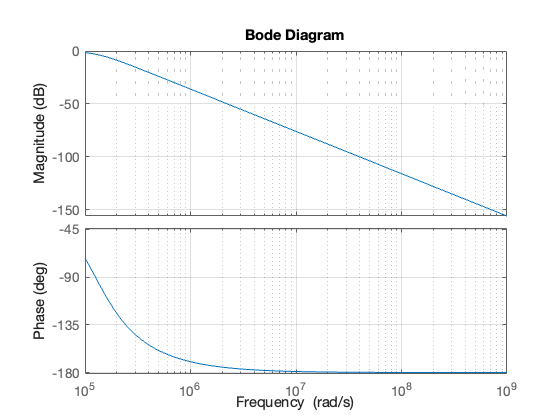

In [17]:
doc bode
bode(Hs,{10e4,10e8})
grid

In [18]:
w_stop = 100*wc

w_stop =
   1.2566e+07


In [19]:
ws = 2* w_stop

ws =
   2.5133e+07


In [20]:
fs = ws/(2*pi)

fs =
     4000000


In [21]:
Ts = 1/fs

Ts =
   2.5000e-07


In [22]:
Hz = c2d(Hs, Ts)


Hz =


  0.0004862 z + 0.0004791


  -----------------------


  z^2 - 1.956 z + 0.9565


Sample time: 2.5e-07 seconds
Discrete-time transfer function.


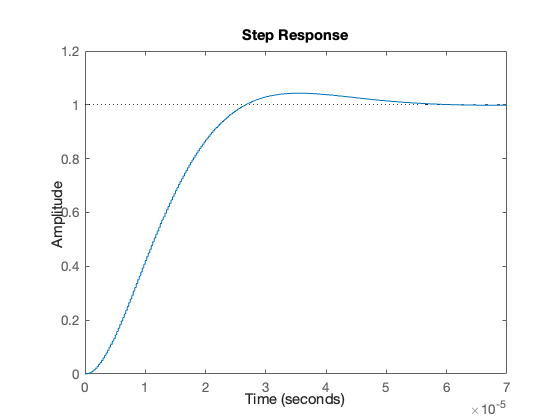

In [23]:
step(Hz)

In [24]:
open digifilter